# 딥러닝 LSTM (다른특성 추가)

In [0]:
seq_length = 25          # 1개 시퀀스의 길이(시계열데이터 입력 개수)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

Using TensorFlow backend.


In [0]:
import os
import pickle

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.optimizers import Adam

In [0]:
os.chdir('/content/drive/My Drive/gold/data')

In [0]:
gold=pickle.load(open('gold_price.pkl','rb'))

In [0]:
stock_info = gold.values[0:,:].astype(np.float)

In [0]:
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7)

In [0]:
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [0]:
# 금 가격 정규화
price = stock_info[:,:1]
norm_price=min_max_scaling(price)

In [0]:
# 나머지 정규화
volume = stock_info[:,1:]
norm_volume = min_max_scaling(volume)

In [0]:
x = np.concatenate((norm_price,norm_volume),axis=1)

In [0]:
y = x[:,[0]]

In [0]:
dataX =[]
dataY= []
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

[[7.03825499e-02 7.55523031e-09 1.95708908e-09 1.69526484e-10
  1.61257359e-08 1.08769134e-07 1.17090059e-07 1.55671461e-07
  1.75502293e-07 1.81900034e-01 2.78402411e-05 1.69319287e-02
  3.75915561e-01 7.90275961e-09 2.17158898e-07 1.59426284e-07
  9.91658741e-07 1.06329273e-07]
 [8.89540798e-02 7.55711394e-09 2.04279414e-09 2.27918940e-10
  1.59788130e-08 1.07780230e-07 1.17120197e-07 1.55340885e-07
  1.72807764e-07 2.23008323e-01 3.83885556e-05 1.77569576e-02
  2.34607702e-01 7.92347951e-09 2.17483455e-07 1.59800372e-07
  9.95452503e-07 1.07064265e-07]
 [8.87766448e-02 7.53874857e-09 1.73293739e-09 2.01548153e-10
  1.59015842e-08 1.07262232e-07 1.16380873e-07 1.53608889e-07
  1.71773652e-07 2.12222671e-01 4.00649842e-05 1.75215042e-02
  4.68331982e-01 8.05344982e-09 2.17212215e-07 1.60550243e-07
  9.95790453e-07 1.07274097e-07]
 [9.74709598e-02 7.58113019e-09 1.68584670e-09 2.79718699e-10
  1.58733298e-08 1.07073869e-07 1.15389143e-07 1.53649387e-07
  1.70553061e-07 2.13796442e-01 4

In [0]:
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])
 

# 1. lstm 50 + lstm50 

In [0]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 18)))
# model.add(layers.Conv1D(50, 5, activation='relu'))
# model.add(layers.Conv1D(50, 5, activation='relu'))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(1, activation='linear'))


optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

W0823 05:40:17.021077 140709509056384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 05:40:17.135571 140709509056384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 05:40:17.171977 140709509056384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 05:40:21.482219 140709509056384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 50)            13800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 34,051
Trainable params: 34,051
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(trainX, trainY,
    validation_data=(testX,testY),
    batch_size=10,
    epochs=20)

W0823 05:40:23.989598 140709509056384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 05:40:36.073855 140709509056384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0823 05:40:36.755728 140709509056384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1591 samples, validate on 682 samples
Epoch 1/20
1591/1591 [==============================] - 126s 79ms/step - loss: 0.0075 - mean_absolute_error: 0.0533 - val_loss: 9.5443e-04 - val_mean_absolute_error: 0.0251
Epoch 2/20
1591/1591 [==============================] - 129s 81ms/step - loss: 0.0017 - mean_absolute_error: 0.0306 - val_loss: 0.0016 - val_mean_absolute_error: 0.0344
Epoch 3/20
1591/1591 [==============================] - 133s 84ms/step - loss: 0.0015 - mean_absolute_error: 0.0291 - val_loss: 8.4160e-04 - val_mean_absolute_error: 0.0238
Epoch 4/20
1591/1591 [==============================] - 134s 84ms/step - loss: 0.0014 - mean_absolute_error: 0.0285 - val_loss: 6.4662e-04 - val_mean_absolute_error: 0.0206
Epoch 5/20
1591/1591 [==============================] - 130s 82ms/step - loss: 0.0012 - mean_absolute_error: 0.0254 - val_loss: 3.3649e-04 - val_mean_absolute_error: 0.0142
Epoch 6/20
1591/1591 [==============================] - 128s 80ms/step - loss: 9.7343e-04 - 

## 평가

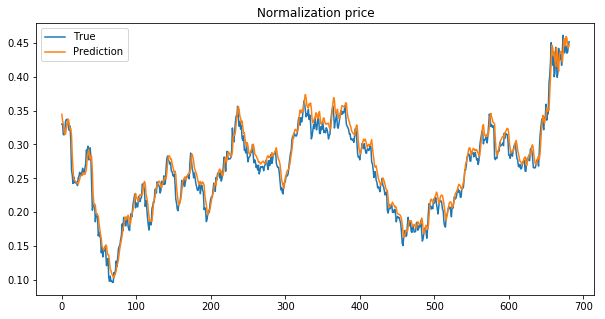

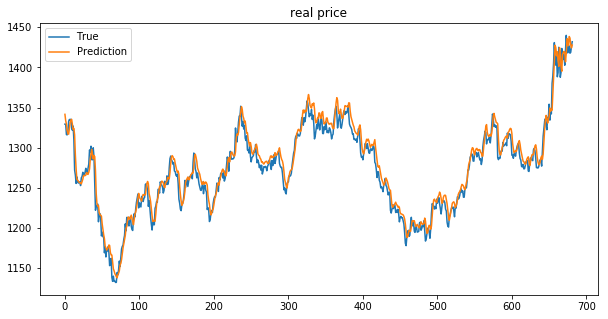

In [0]:
pred = model.predict(testX)
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(testY, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.title('Normalization price')
plt.show()

test_predict = reverse_min_max_scaling(price ,model.predict(testX))
train_sizee = reverse_min_max_scaling(price ,testY)
test_predict[0] # 다음날 가격
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(train_sizee, label='True')
ax.plot(test_predict, label='Prediction')
ax.legend()
plt.title('real price')
plt.show()

In [0]:
LSTM1_1 = pred.mean() - testY.mean()
LSTM1_2 = test_predict = train_sizee[-1:] - test_predict[-1:]
print('예상값과 다음날 가격의 차이 : ',LSTM1_2,'\n1번 모델의 정확도 : ',LSTM1_1)  
# 정확도는 0에 가까울 수록 좋음

예상값과 다음날 가격의 차이 :  [[4.18360352]] 
1번 모델의 정확도 :  0.006458537161205979


# 2. LSTM conv1D 50,2 + lstm50  + lstm100

In [0]:
model = Sequential()
model.add(layers.Conv1D(50, 2, activation='relu',input_shape=(seq_length,18)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1, activation='linear'))
optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

model.fit(trainX, trainY,
    validation_data=(testX,testY),
    batch_size=10,
    epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 24, 50)            1850      
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 82,551
Trainable params: 82,551
Non-trainable params: 0
_________________________________________________________________
Train on 1591 samples, validate on 682 samples
Epoch 1/20
1591/1591 [==============================] - 124s 78ms/step - loss: 0.0074 - mean_absolute_error: 0.0503 - val_loss: 7.7581e-04 - val_mean_absolute_error: 0.0220
Epoch 2/20
1591/1591 [============================

## 평가

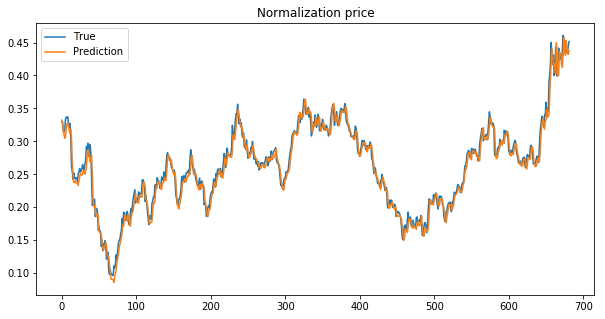

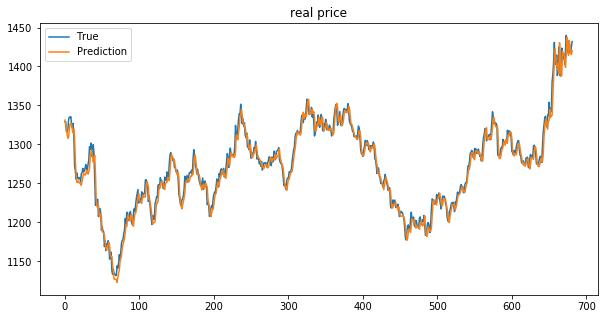


예상값과 다음날 가격의 차이 :  [[11.60120605]] 
1번 모델의 정확도 :  -0.003090484559680251


In [0]:
pred = model.predict(testX)
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(testY, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.title('Normalization price')
plt.show()

test_predict = reverse_min_max_scaling(price ,model.predict(testX))
train_sizee = reverse_min_max_scaling(price ,testY)
test_predict[0] # 다음날 가격
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(train_sizee, label='True')
ax.plot(test_predict, label='Prediction')
ax.legend()
plt.title('real price')
plt.show()

LSTM2_1 = pred.mean() - testY.mean()
LSTM2_2 = test_predict = train_sizee[-1:] - test_predict[-1:]
print('\n예상값과 다음날 가격의 차이 : ',LSTM2_2,'\n1번 모델의 정확도 : ',LSTM2_1)  
# 정확도는 0에 가까울 수록 좋음

# 3. 

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 18)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(300, return_sequences=False))
model.add(Dense(1, activation='linear'))
optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

model.fit(trainX, trainY,
    validation_data=(testX,testY),
    batch_size=10,
    epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 25, 50)            13800     
_________________________________________________________________
lstm_6 (LSTM)                (None, 25, 50)            20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 300)               421200    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 455,501
Trainable params: 455,501
Non-trainable params: 0
_________________________________________________________________
Train on 1591 samples, validate on 682 samples
Epoch 1/20
1591/1591 [==============================] - 174s 109ms/step - loss: 0.0071 - mean_absolute_error: 0.0526 - val_loss: 8.6749e-04 - val_mean_absolute_error: 0.0228
Epoch 2/20
1591/1591 [=========================

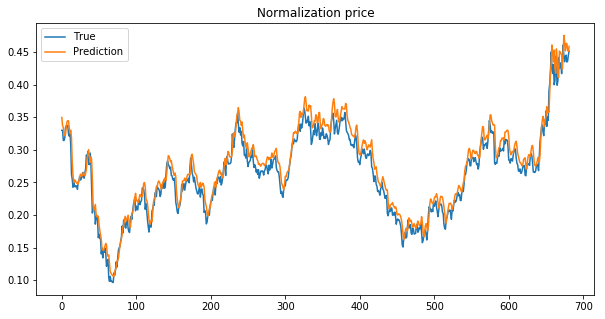

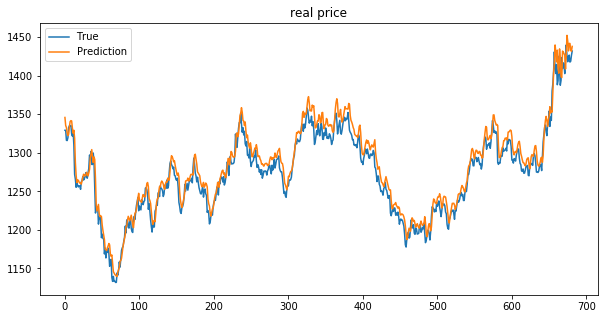


예상값과 다음날 가격의 차이 :  [[-6.04979492]] 
1번 모델의 정확도 :  0.011360303938244554


In [0]:
pred = model.predict(testX)
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(testY, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.title('Normalization price')
plt.show()

test_predict = reverse_min_max_scaling(price ,model.predict(testX))
train_sizee = reverse_min_max_scaling(price ,testY)
test_predict[0] # 다음날 가격
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(train_sizee, label='True')
ax.plot(test_predict, label='Prediction')
ax.legend()
plt.title('real price')
plt.show()

LSTM3_1 = pred.mean() - testY.mean()
LSTM3_2 = test_predict = train_sizee[-1:] - test_predict[-1:]
print('\n예상값과 다음날 가격의 차이 : ',LSTM3_2,'\n1번 모델의 정확도 : ',LSTM3_1)  
# 정확도는 0에 가까울 수록 좋음

# 4. 

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 18)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(300, return_sequences=False))
model.add(Dense(1, activation='linear'))
optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

model.fit(trainX, trainY,
    validation_data=(testX,testY),
    batch_size=10,
    epochs=20)

W0823 10:43:09.938643 140306201413504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 25, 50)            13800     
_________________________________________________________________
lstm_8 (LSTM)                (None, 25, 50)            20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 25, 50)            20200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 25, 50)            20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 25, 50)            20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 300)               421200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
Total para

W0823 10:43:10.299560 140306201413504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 10:43:14.540780 140306201413504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0823 10:43:14.846349 140306201413504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1591 samples, validate on 682 samples
Epoch 1/20
1591/1591 [==============================] - 91s 57ms/step - loss: 0.0122 - mean_absolute_error: 0.0731 - val_loss: 0.0081 - val_mean_absolute_error: 0.0804
Epoch 2/20
1591/1591 [==============================] - 153s 96ms/step - loss: 0.0051 - mean_absolute_error: 0.0533 - val_loss: 0.0017 - val_mean_absolute_error: 0.0343
Epoch 3/20
1591/1591 [==============================] - 155s 97ms/step - loss: 0.0043 - mean_absolute_error: 0.0495 - val_loss: 0.0014 - val_mean_absolute_error: 0.0297
Epoch 4/20
1591/1591 [==============================] - 157s 99ms/step - loss: 0.0037 - mean_absolute_error: 0.0462 - val_loss: 0.0014 - val_mean_absolute_error: 0.0298
Epoch 5/20
1591/1591 [==============================] - 157s 99ms/step - loss: 0.0026 - mean_absolute_error: 0.0388 - val_loss: 8.1425e-04 - val_mean_absolute_error: 0.0229
Epoch 6/20
1591/1591 [==============================] - 157s 98ms/step - loss: 0.0022 - mean_absolute_err

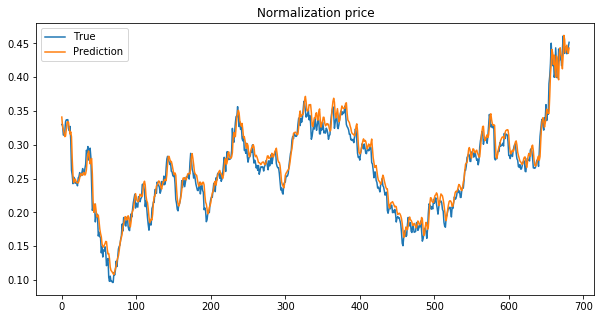

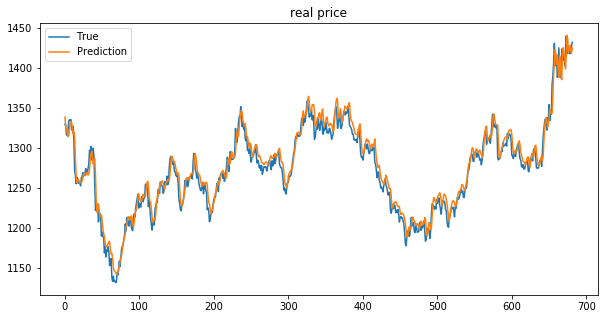


예상값과 다음날 가격의 차이 :  [[7.18775391]] 
1번 모델의 정확도 :  0.005875514328335496


In [0]:
pred = model.predict(testX)
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(testY, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.title('Normalization price')
plt.show()

test_predict = reverse_min_max_scaling(price ,model.predict(testX))
train_sizee = reverse_min_max_scaling(price ,testY)
test_predict[0] # 다음날 가격
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(train_sizee, label='True')
ax.plot(test_predict, label='Prediction')
ax.legend()
plt.title('real price')
plt.show()

LSTM4_1 = pred.mean() - testY.mean()
LSTM4_2 = test_predict = train_sizee[-1:] - test_predict[-1:]
print('\n예상값과 다음날 가격의 차이 : ',LSTM4_2,'\n1번 모델의 정확도 : ',LSTM4_1)  
# 정확도는 0에 가까울 수록 좋음

# 5. 

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 18)))
model.add(layers.Conv1D(50, 2, activation='relu'))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(150, return_sequences=False))

model.add(Dense(1, activation='linear'))
optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

model.fit(trainX, trainY,
    validation_data=(testX,testY),
    batch_size=10,
    epochs=20)

W0827 12:00:04.546472 140185268471680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 12:00:04.565382 140185268471680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 12:00:04.568518 140185268471680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 12:00:05.512442 140185268471680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 50)            13800     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 50)            5050      
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 24, 100)           60400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 150)               150600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total para

W0827 12:00:05.897763 140185268471680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 12:00:08.515194 140185268471680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0827 12:00:08.715412 140185268471680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1591 samples, validate on 682 samples
Epoch 1/20
1591/1591 [==============================] - 54s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0764 - val_loss: 0.0037 - val_mean_absolute_error: 0.0509
Epoch 2/20
1591/1591 [==============================] - 64s 40ms/step - loss: 0.0042 - mean_absolute_error: 0.0489 - val_loss: 0.0013 - val_mean_absolute_error: 0.0293
Epoch 3/20
1591/1591 [==============================] - 64s 40ms/step - loss: 0.0047 - mean_absolute_error: 0.0515 - val_loss: 0.0010 - val_mean_absolute_error: 0.0257
Epoch 4/20
1591/1591 [==============================] - 64s 40ms/step - loss: 0.0028 - mean_absolute_error: 0.0396 - val_loss: 0.0012 - val_mean_absolute_error: 0.0279
Epoch 5/20
1591/1591 [==============================] - 63s 40ms/step - loss: 0.0026 - mean_absolute_error: 0.0383 - val_loss: 6.1712e-04 - val_mean_absolute_error: 0.0192
Epoch 6/20
1591/1591 [==============================] - 64s 40ms/step - loss: 0.0019 - mean_absolute_error: 0

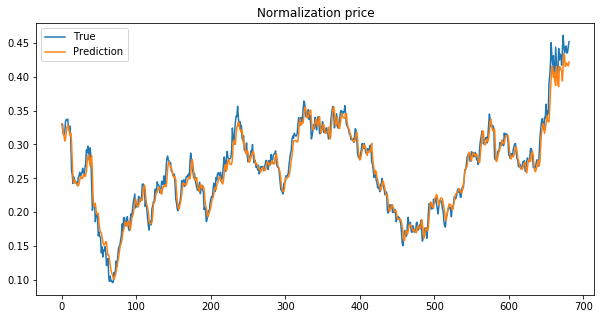

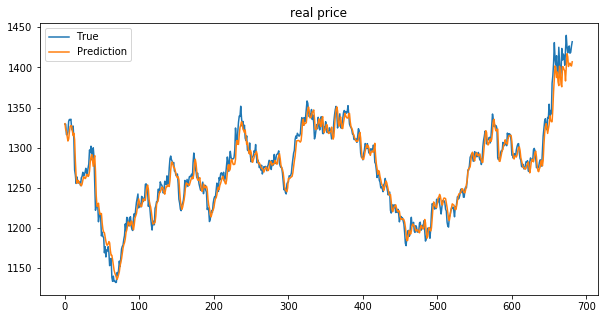


예상값과 다음날 가격의 차이 :  [[25.03296875]] 
1번 모델의 정확도 :  -0.002282662809039382


In [0]:
pred = model.predict(testX)
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(testY, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.title('Normalization price')
plt.show()

test_predict = reverse_min_max_scaling(price ,model.predict(testX))
train_sizee = reverse_min_max_scaling(price ,testY)
test_predict[0] # 다음날 가격
fig = plt.figure(facecolor='white', figsize=(20/2, 10/2))
ax = fig.add_subplot(111)
ax.plot(train_sizee, label='True')
ax.plot(test_predict, label='Prediction')
ax.legend()
plt.title('real price')
plt.show()

LSTM5_1 = pred.mean() - testY.mean()
LSTM5_2 = train_sizee[-1:] - test_predict[-1:]
print('\n예상값과 다음날 가격의 차이 : ',LSTM5_2,'\n1번 모델의 정확도 : ',LSTM5_1)  
# 정확도는 0에 가까울 수록 좋음

In [0]:
test_predict[-1:]

array([[1406.957]], dtype=float32)

In [0]:
acc = [LSTM1_1, LSTM2_1, LSTM3_1, LSTM4_1, LSTM5_1]
diff = [LSTM1_2, LSTM2_2, LSTM3_2, LSTM4_2, LSTM5_2]

NameError: ignored

In [0]:
diff

In [0]:
acc

In [0]:
np.min(diff)

In [0]:
model.save('lstm25_5.h5')

In [0]:
from keras.models import load_model

In [0]:
gold_model = load_model('lstm25_5.h5')

In [0]:
gold_model.fit(trainX, trainY,
    validation_data=(testX,testY),
    batch_size=10,
    epochs=20)

Train on 1591 samples, validate on 682 samples
Epoch 1/20
1591/1591 [==============================] - 31s 20ms/step - loss: 4.8549e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0022 - val_mean_absolute_error: 0.0448
Epoch 2/20
1591/1591 [==============================] - 31s 19ms/step - loss: 7.1281e-04 - mean_absolute_error: 0.0198 - val_loss: 1.4242e-04 - val_mean_absolute_error: 0.0092
Epoch 3/20
1591/1591 [==============================] - 31s 20ms/step - loss: 4.9091e-04 - mean_absolute_error: 0.0160 - val_loss: 1.5083e-04 - val_mean_absolute_error: 0.0093
Epoch 4/20
1591/1591 [==============================] - 31s 20ms/step - loss: 5.3638e-04 - mean_absolute_error: 0.0170 - val_loss: 4.5592e-04 - val_mean_absolute_error: 0.0188
Epoch 5/20
1591/1591 [==============================] - 31s 20ms/step - loss: 6.6300e-04 - mean_absolute_error: 0.0189 - val_loss: 2.0311e-04 - val_mean_absolute_error: 0.0116
Epoch 6/20
1591/1591 [==============================] - 31s 20ms/step - loss:

In [0]:
def prediction(model):
  pred = model.predict(testX)
  fig = plt.figure(facecolor='white', figsize=(20, 10))
  ax = fig.add_subplot(111)
  ax.plot(testY, label='True')
  ax.plot(pred, label='Prediction')
  ax.legend()
  plt.title('Normalization price')
  plt.show()

  test_predict = reverse_min_max_scaling(price ,model.predict(testX))
  train_sizee = reverse_min_max_scaling(price ,testY)
  test_predict[0] # 다음날 가격
  fig = plt.figure(facecolor='white', figsize=(20, 10))
  ax = fig.add_subplot(111)
  ax.plot(train_sizee, label='True')
  ax.plot(test_predict, label='Prediction')
  ax.legend()
  plt.title('real price')
  plt.show()
  
  LSTM5_1 = pred.mean() - testY.mean()
  LSTM5_2 =  train_sizee[-1:] - test_predict[-1:]
  LSTM5_3 = test_predict.mean() -  train_sizee.mean()
  print('\n',LSTM5_1,'\n',LSTM5_2,'\n',LSTM5_3)

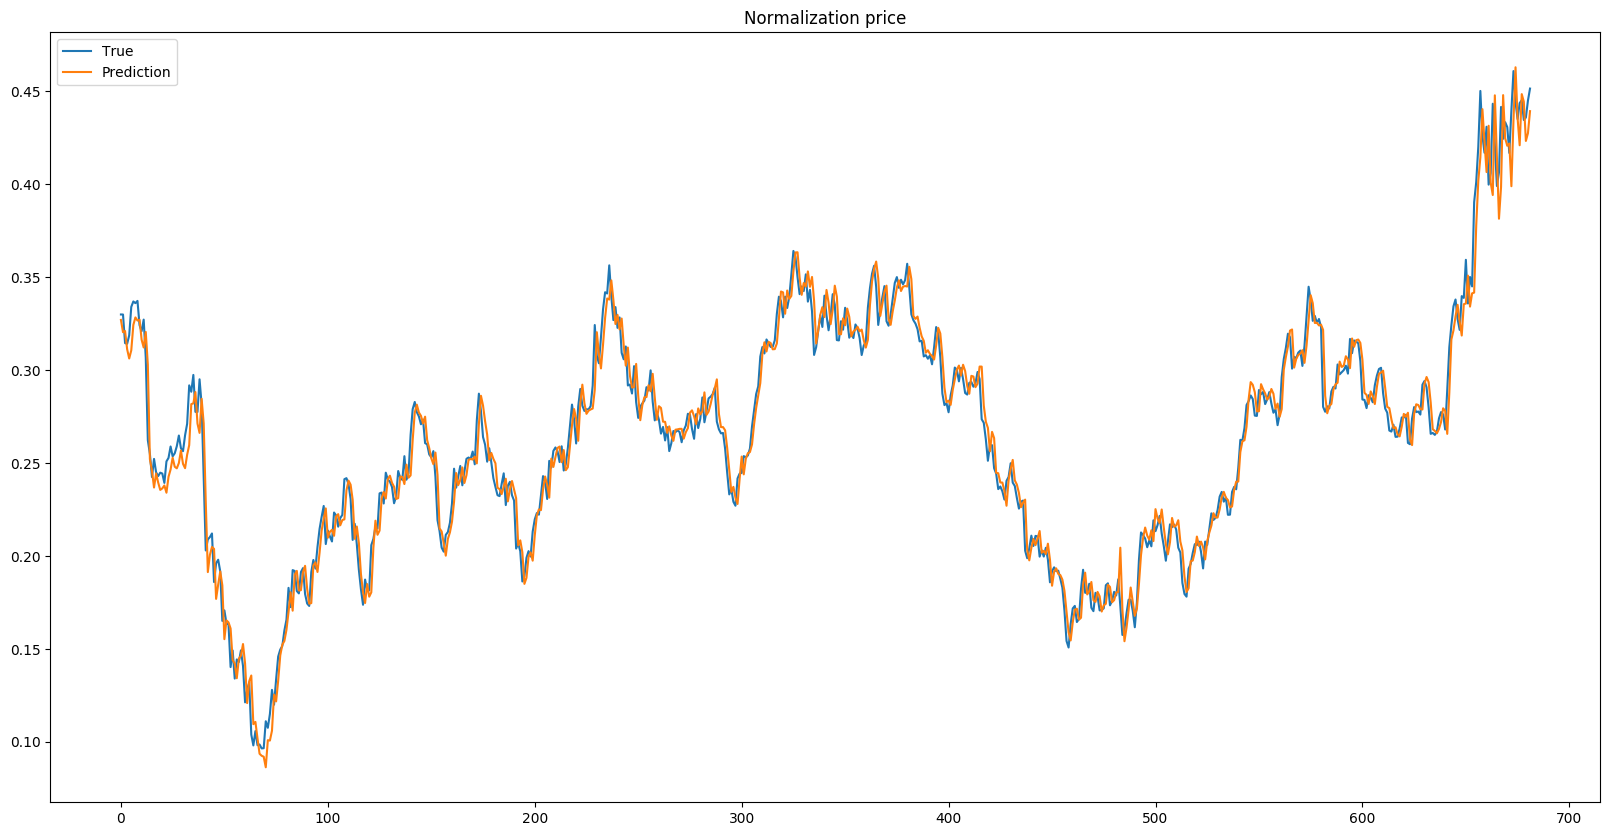

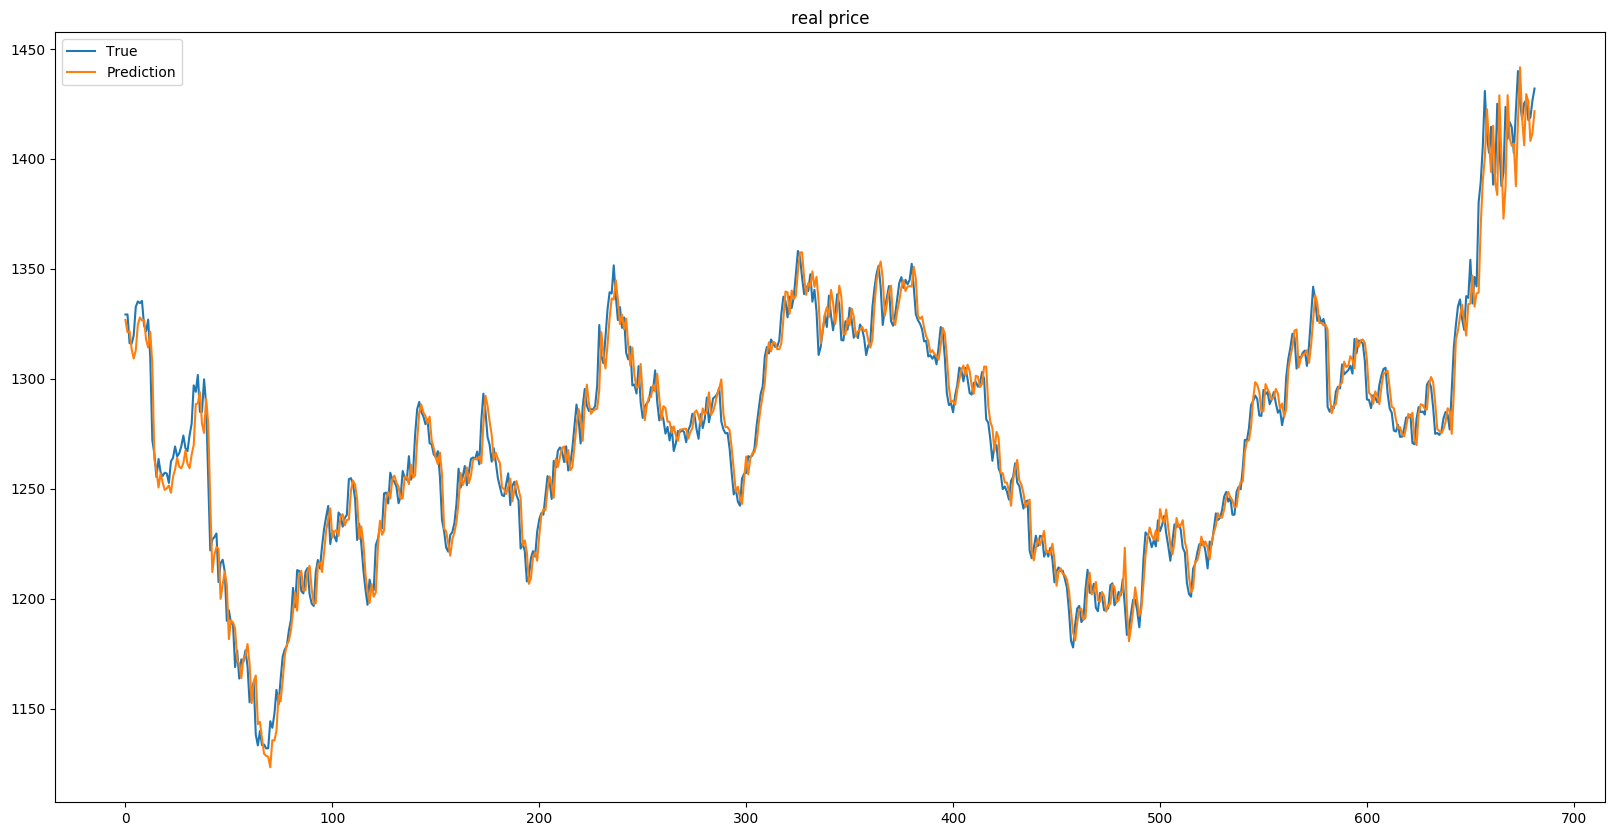


 -0.00016499918713691608 
 [[10.2691748]] 
 -0.13948151977183443


In [0]:
prediction(gold_model)

In [0]:
LSTM5_1 = test_predict[-1:].mean() -  train_sizee[-1:].mean()

In [0]:
LSTM5_1 

In [0]:
test_predict[-1:]

array([[5.77808594]])

In [0]:
plt.style.use("default")